# Modeling

## 모델 생성

In [45]:
data=data.round()
data= data.fillna(0)
data=data.astype(dtype='int64')

disease=disease.round()
disease= disease.fillna(0)
disease=disease.astype(dtype='int64')


In [46]:
def model(data,target):
    x_train, x_valid, y_train, y_valid = train_test_split(data,target, test_size=0.2, shuffle=True, stratify=target, random_state=34)
    
    model = models.Sequential()
    model.add(Dense(64, input_shape=(107,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics="accuracy")

    early_stopping = EarlyStopping(monitor="val_loss",
                               patience=5)

    history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    callbacks=early_stopping,
                    validation_data=(x_valid, y_valid))
    
    predictions = model.predict(x_valid)
    
    test_mse_score, test_mae_score = model.evaluate(x_valid, y_valid)
    
    print(f'test_mae_score:{test_mae_score}')
    
    return x_valid,y_valid,predictions

In [47]:
def loop(int):
    target=disease.iloc[:,int]
    target = target.replace(-1, 0)
    x_valid,y_valid,predictions=model(data,target)
    probability=predictions.copy()
    
    for ii in range(len(predictions)):
        if predictions[ii]>0.5:
            predictions[ii]=1
        elif predictions[ii]<0.5:
            predictions[ii]=0
        else:
            predictions[ii]=0.5
    
    return x_valid,y_valid,probability,predictions

In [48]:
x_valid,y_vaild,probability,predictions=loop(0)

Epoch 1/50
891/891 [==============================] - 4s 3ms/step - loss: 5.2088 - accuracy: 0.5943 - val_loss: 0.9799 - val_accuracy: 0.6782
Epoch 2/50
891/891 [==============================] - 2s 3ms/step - loss: 0.8174 - accuracy: 0.6706 - val_loss: 0.7585 - val_accuracy: 0.6699
Epoch 3/50
891/891 [==============================] - 6s 7ms/step - loss: 0.7528 - accuracy: 0.7037 - val_loss: 0.6570 - val_accuracy: 0.7370
Epoch 4/50
891/891 [==============================] - 4s 4ms/step - loss: 0.5880 - accuracy: 0.7470 - val_loss: 0.5997 - val_accuracy: 0.7262
Epoch 5/50
891/891 [==============================] - 3s 4ms/step - loss: 0.4892 - accuracy: 0.7847 - val_loss: 0.4787 - val_accuracy: 0.7773
Epoch 6/50
891/891 [==============================] - 2s 2ms/step - loss: 0.4715 - accuracy: 0.8040 - val_loss: 0.3643 - val_accuracy: 0.8580
Epoch 7/50
891/891 [==============================] - 4s 4ms/step - loss: 0.4127 - accuracy: 0.8251 - val_loss: 0.3350 - val_accuracy: 0.8656
Epoch 

In [49]:
predictions[:30].T

array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.]],
      dtype=float32)

In [50]:
y_vaild[:30].T

33785    0
35125    0
23041    1
7615     0
8610     1
29408    0
17746    0
33604    0
26463    0
4608     0
17400    1
21769    0
31466    0
3744     0
5879     1
16179    1
8704     0
26421    1
9659     0
8438     0
20824    1
14206    1
30921    1
23581    0
13587    0
1379     1
28734    0
34684    1
23156    0
33937    0
Name: 비만, dtype: int64

## 비만 모델 평가 및 정확도 확인

In [51]:
print('accuracy:', metrics.accuracy_score(y_vaild,predictions) )

print('precision:', metrics.precision_score(y_vaild,predictions) )

print('recall:', metrics.recall_score(y_vaild,predictions) )

print('f1:', metrics.f1_score(y_vaild,predictions) )


accuracy: 0.921274207128824
precision: 0.8525245187068652
recall: 0.9380495603517186
f1: 0.893244529019981


In [52]:
print(metrics.classification_report(y_vaild,predictions))

print(metrics.confusion_matrix(y_vaild,predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      4624
           1       0.85      0.94      0.89      2502

    accuracy                           0.92      7126
   macro avg       0.91      0.93      0.92      7126
weighted avg       0.93      0.92      0.92      7126

[[4218  406]
 [ 155 2347]]


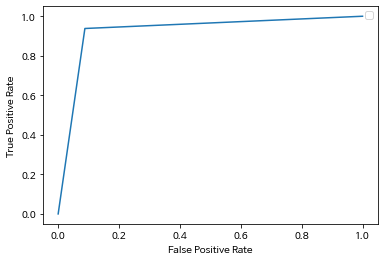

In [53]:
fprs, tprs, _ = roc_curve(y_vaild, predictions) 
plt.plot(fprs,tprs)#calculate fprs and tprs for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [54]:
x_valid["비만 예측 확률"]=np.round(probability,2)

In [58]:
x_valid

,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,비만 예측 확률
33785,2021,9,1,2,43,3,4,4,4,4,...,8,3268,2735,1665,178,1,2,15,29,0.00
35125,2021,15,1,1,59,3,4,3,4,4,...,18,3239,2902,1016,133,1,1,7,43,0.02
23041,2018,2,1,2,49,3,4,4,4,2,...,8,3932,1460,2894,20,1,1,9,13,0.99
7615,2013,1,1,1,79,3,1,3,1,3,...,22,3279,4614,889,1,2,1,19,292,0.02
8610,2013,7,1,1,53,4,4,5,5,3,...,20,2161,2682,4445,35,2,1,28,68,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,2012,9,1,1,70,3,2,4,2,1,...,7,1617,1878,1770,75,1,1,8,76,0.06
9717,2013,13,1,2,34,3,4,4,4,3,...,20,2681,1829,2427,129,2,1,14,25,0.00
19941,2017,4,1,2,63,1,1,2,2,1,...,13,4178,2597,2712,157,1,1,14,56,0.02
29758,2020,1,1,1,80,3,2,3,2,3,...,7,973,1636,2396,225,1,1,7,16,0.00


In [59]:
x_valid.iloc[0]

year        2021.0
region         9.0
town_t         1.0
sex            2.0
age           43.0
             ...  
N_B1           1.0
N_B2           2.0
N_NIAC        15.0
N_VITC        29.0
비만 예측 확률       0.0
Name: 33785, Length: 108, dtype: float64

## 13가지 질병 유/무 확률 예측

In [60]:
len(x_valid.columns)

108

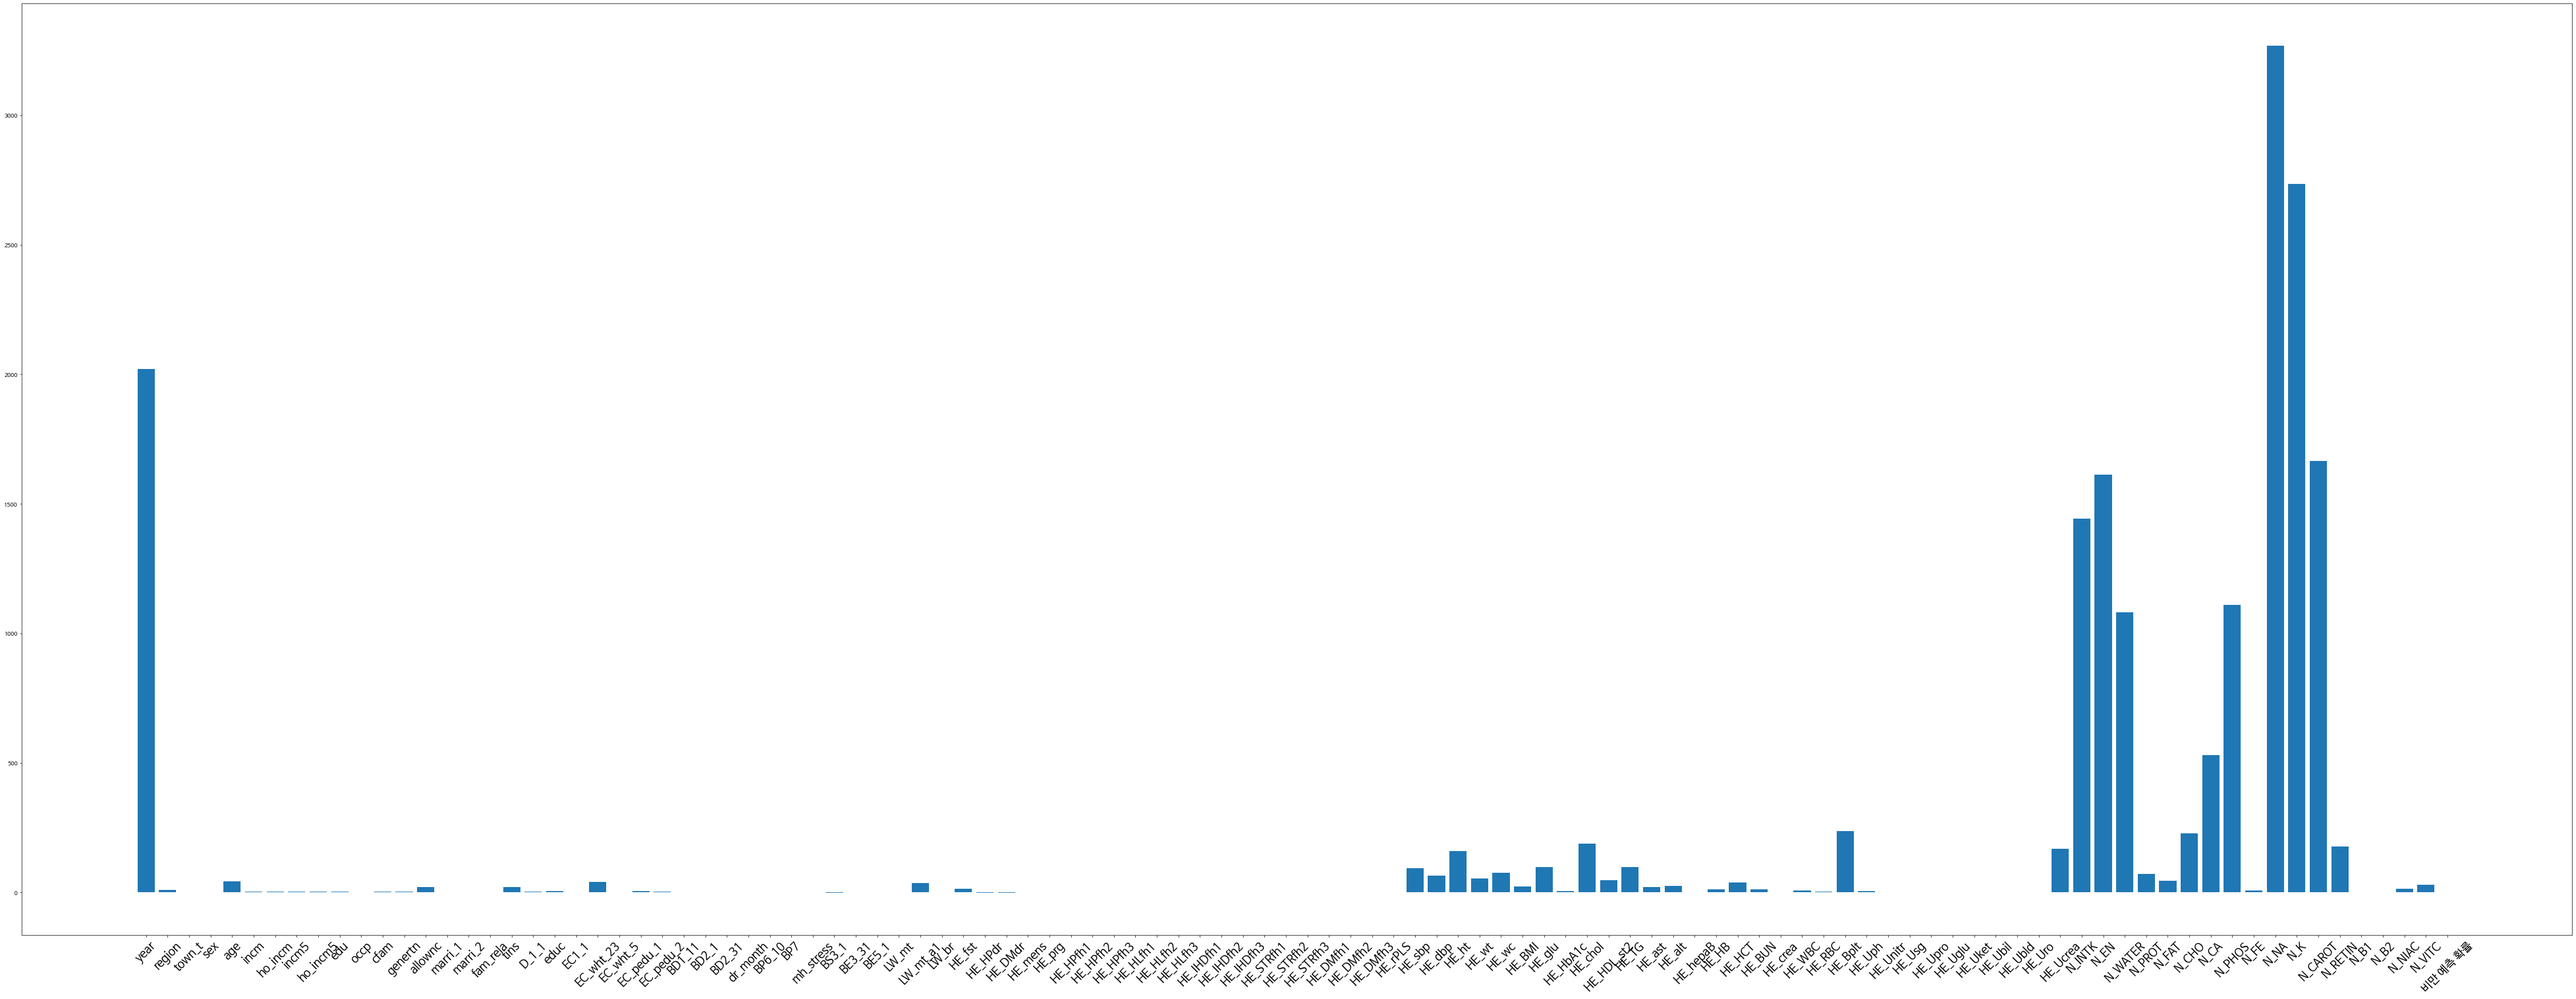

In [61]:
index=np.arange(len(x_valid.iloc[0].values))

plt.figure (figsize=(80,30))
plt.bar(index, x_valid.iloc[0])
plt.xticks(index, x_valid.columns, fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [64]:
for i in range(13):
    x_valid,y_vaild,probability,predictions=loop(i)
    if i==0:
        disease_predict=pd.DataFrame(probability,columns=[disease.columns[i]])
    else:
        disease_predict[disease.columns[i]]=probability

Epoch 1/50
891/891 [==============================] - 5s 4ms/step - loss: 7.5873 - accuracy: 0.5799 - val_loss: 1.3863 - val_accuracy: 0.6548
Epoch 2/50
891/891 [==============================] - 3s 3ms/step - loss: 1.3122 - accuracy: 0.6682 - val_loss: 0.7318 - val_accuracy: 0.7564
Epoch 3/50
891/891 [==============================] - 3s 3ms/step - loss: 0.9944 - accuracy: 0.7152 - val_loss: 0.8113 - val_accuracy: 0.7070
Epoch 4/50
891/891 [==============================] - 2s 3ms/step - loss: 0.7875 - accuracy: 0.7449 - val_loss: 0.9836 - val_accuracy: 0.6958
Epoch 5/50
891/891 [==============================] - 2s 3ms/step - loss: 0.5646 - accuracy: 0.7839 - val_loss: 0.5154 - val_accuracy: 0.8219
Epoch 6/50
891/891 [==============================] - 3s 3ms/step - loss: 0.7138 - accuracy: 0.7679 - val_loss: 0.3527 - val_accuracy: 0.8595
Epoch 7/50
891/891 [==============================] - 3s 4ms/step - loss: 0.4459 - accuracy: 0.8142 - val_loss: 0.3971 - val_accuracy: 0.8289
Epoch 

In [65]:
disease_predict

,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,0.003259,0.760833,0.026243,0.237915,9.848748e-01,0.035387,0.000963,0.026677,0.011574,0.046165,0.021356,0.250496,0.067285
1,0.027289,0.881933,0.999997,0.237915,0.000000e+00,0.035387,0.092005,0.026677,0.000088,0.050905,0.020462,0.008257,0.074453
2,0.996499,0.955042,0.128956,0.237915,9.646905e-07,0.035387,0.075314,0.026677,0.010461,0.043419,0.014894,0.010230,0.092788
3,0.026696,0.643513,0.013675,0.237915,1.000000e+00,0.035387,0.122101,0.026677,0.001229,0.043641,0.036102,0.054234,0.058001
4,0.998745,0.797887,0.016169,0.237915,1.000000e+00,0.035387,0.009979,0.026677,0.000883,0.068143,0.026001,0.293872,0.017226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,0.077429,0.494079,0.090583,0.237915,3.271972e-14,0.035387,0.627064,0.026677,0.168679,0.044251,0.018231,0.114103,0.032098
7122,0.000040,0.854191,0.039495,0.237915,1.178553e-04,0.035387,0.063869,0.026677,0.012817,0.042843,0.028562,0.004517,0.112794
7123,0.015315,0.928399,0.023303,0.237915,3.159839e-07,0.035387,0.000016,0.026677,0.003219,0.062250,0.033107,0.006192,0.028238
7124,0.010666,0.924106,0.030566,0.237915,1.004857e-06,0.035387,0.000031,0.026677,0.026667,0.047446,0.025883,0.010202,0.107313


In [66]:
x_valid

,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,...,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC
27711,2019,9,1,2,45,2,2,2,3,3,...,370,3,2403,1008,1081,12,0,0,4,16
34855,2021,12,2,2,58,2,3,2,3,1,...,836,5,2625,2067,1313,89,1,1,6,21
24385,2018,9,1,2,59,4,4,5,5,4,...,2144,30,4528,4750,3453,336,2,3,28,226
22223,2017,17,1,2,49,3,3,3,4,4,...,1367,32,4034,4907,3731,137,1,2,20,238
5557,2012,8,2,2,33,2,3,2,3,4,...,1021,11,12630,2647,3101,81,1,1,16,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15596,2015,15,1,1,34,2,3,3,3,4,...,1203,24,5078,4110,6370,22,3,1,17,55
14550,2015,8,1,2,79,4,3,5,3,1,...,344,5,1792,1099,1287,1,0,0,4,16
31944,2020,15,1,1,55,4,4,5,5,4,...,1304,11,3841,2910,1240,11,2,1,11,99
30878,2020,9,1,2,44,3,4,4,4,3,...,662,6,1285,1484,671,64,0,1,14,34


## 13가지 모델 평가 및 정확도 확인

Epoch 1/50
891/891 [==============================] - 5s 4ms/step - loss: 4.4606 - accuracy: 0.6052 - val_loss: 4.7378 - val_accuracy: 0.4485
Epoch 2/50
891/891 [==============================] - 2s 3ms/step - loss: 1.8171 - accuracy: 0.6801 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/50
891/891 [==============================] - 2s 2ms/step - loss: 1.0295 - accuracy: 0.7142 - val_loss: 0.4416 - val_accuracy: 0.8229
Epoch 4/50
891/891 [==============================] - 2s 3ms/step - loss: 0.6874 - accuracy: 0.7565 - val_loss: 0.4605 - val_accuracy: 0.8204
Epoch 5/50
891/891 [==============================] - 3s 3ms/step - loss: 0.7092 - accuracy: 0.7579 - val_loss: 0.9555 - val_accuracy: 0.6253
Epoch 6/50
891/891 [==============================] - 4s 4ms/step - loss: 0.5748 - accuracy: 0.7744 - val_loss: 0.4957 - val_accuracy: 0.7870
Epoch 7/50
891/891 [==============================] - 2s 3ms/step - loss: 0.6179 - accuracy: 0.7740 - val_loss: 0.7877 - val_accuracy: 0.7074
Epoch 

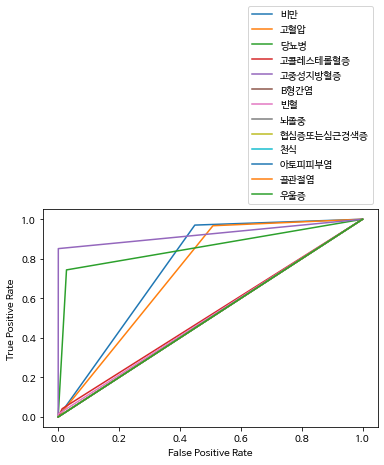

In [67]:
acc=[]
pre=[]
recall=[]
f1=[]
for i in range(13):
    x_valid,y_vaild,probability,predictions=loop(i)
    
    if i==0:
        disease_predict=pd.DataFrame(probability,columns=[disease.columns[i]])
    else:
        disease_predict[disease.columns[i]]=probability
    
    acc.append(metrics.accuracy_score(y_vaild,predictions))
    pre.append(metrics.precision_score(y_vaild,predictions))
    recall.append( metrics.recall_score(y_vaild,predictions))
    f1.append(metrics.f1_score(y_vaild,predictions))
        
    print(f'{disease.columns[i]}')
    
    print('accuracy:', metrics.accuracy_score(y_vaild,predictions) )

    print('precision:', metrics.precision_score(y_vaild,predictions) )

    print('recall:', metrics.recall_score(y_vaild,predictions) )

    print('f1:', metrics.f1_score(y_vaild,predictions) )

    print(metrics.classification_report(y_vaild,predictions))

    print(metrics.confusion_matrix(y_vaild,predictions))
    
    fprs, tprs, _ = roc_curve(y_vaild, predictions) 
    plt.plot(fprs,tprs,label=disease.columns[i])#calculate fprs and tprs for each class
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right",bbox_to_anchor=(1,1))
plt.show()

In [68]:
print('accuracy:', np.mean(acc) )

print('precision:', np.mean(pre))

print('recall:', np.mean(recall) )

print('f1:', np.mean(f1) )

accuracy: 0.8926790302035881
precision: 0.3165549015643052
recall: 0.27607350591157026
f1: 0.24535939770758347
